In [1]:
from google.colab import files
uploaded = files.upload()

Saving Startup_Scoring_Dataset.csv to Startup_Scoring_Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Setup
sns.set(style="whitegrid")

In [3]:
# Load dataset (after upload)
df = pd.read_csv("Startup_Scoring_Dataset.csv")
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [4]:
df_scaled = df.copy()

# Define features
positive_features = [
    'team_experience',
    'market_size_million_usd',
    'monthly_active_users',
    'funds_raised_inr',
    'valuation_inr'
]

scaler = MinMaxScaler()
df_scaled[positive_features] = scaler.fit_transform(df_scaled[positive_features])
df_scaled['monthly_burn_rate_inr'] = 1 - scaler.fit_transform(df[['monthly_burn_rate_inr']])

In [5]:
weights = {
    'team_experience': 0.15,
    'market_size_million_usd': 0.20,
    'monthly_active_users': 0.25,
    'monthly_burn_rate_inr': 0.10,
    'funds_raised_inr': 0.15,
    'valuation_inr': 0.15
}

# Final health score (0–100)
df_scaled['health_score'] = sum(df_scaled[col] * weights[col] for col in weights) * 100
df_scaled['rank'] = df_scaled['health_score'].rank(method='dense', ascending=False).astype(int)
df_scaled.sort_values(by='rank').head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,health_score,rank
5,S006,1.000000,0.409369,0.972689,0.960596,0.985549,0.609569,81.037331,1
76,S077,0.888889,0.349287,0.871738,0.898704,0.930570,0.799320,77.047933,2
44,S045,1.000000,0.742363,0.816870,0.267854,0.678663,0.835169,75.655026,3
32,S033,0.444444,0.868635,0.643919,0.808794,0.992092,0.788628,74.936099,4
12,S013,0.777778,0.734216,0.843372,0.725233,0.873349,0.459163,74.675295,5


In [10]:
top_10 = df_scaled.sort_values(by='health_score', ascending=False).head(10)
bottom_10 = df_scaled.sort_values(by='health_score', ascending=True).head(10)

print(" Top 10 Startups:\n", top_10[['startup_id', 'health_score', 'rank']])
print("\n Bottom 10 Startups:\n", bottom_10[['startup_id', 'health_score', 'rank']])


 Top 10 Startups:
    startup_id  health_score  rank
5        S006     81.037331     1
76       S077     77.047933     2
44       S045     75.655026     3
32       S033     74.936099     4
12       S013     74.675295     5
28       S029     73.114982     6
96       S097     70.037973     7
11       S012     69.810579     8
7        S008     69.671483     9
42       S043     69.554850    10

 Bottom 10 Startups:
    startup_id  health_score  rank
54       S055     19.094732   100
97       S098     26.158777    99
22       S023     26.262269    98
57       S058     28.567332    97
83       S084     30.144740    96
78       S079     30.430187    95
50       S051     32.321262    94
60       S061     32.964227    93
16       S017     33.527899    92
73       S074     33.662372    91


/tmp/ipython-input-7-126668984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_scores, x='rank', y='health_score', palette='viridis')


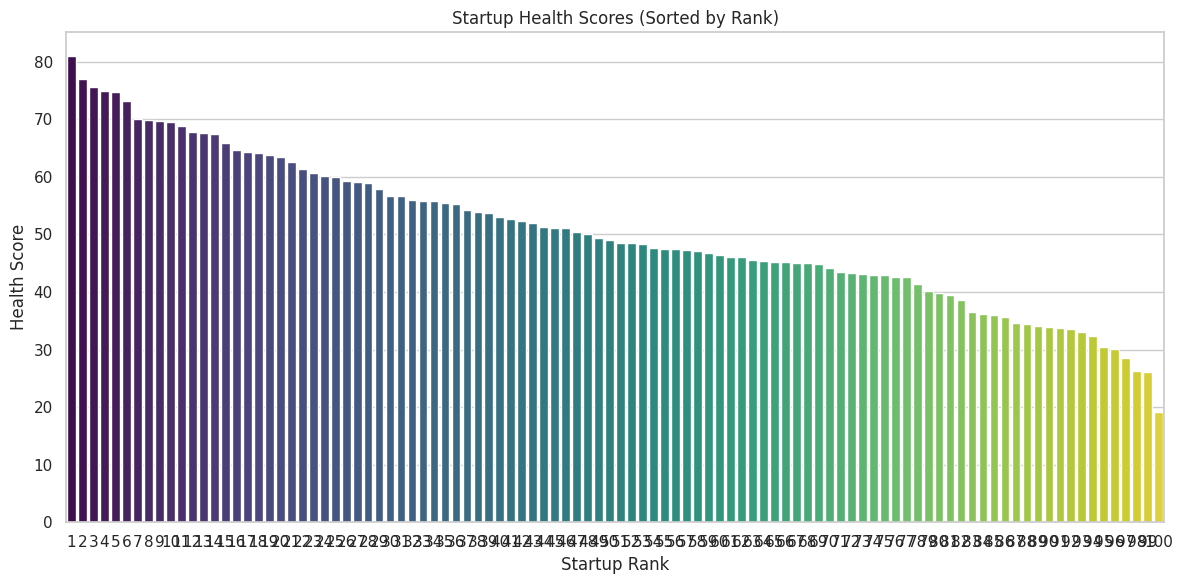

In [7]:
plt.figure(figsize=(12, 6))
sorted_scores = df_scaled.sort_values(by='health_score', ascending=False)
sns.barplot(data=sorted_scores, x='rank', y='health_score', palette='viridis')
plt.title('Startup Health Scores (Sorted by Rank)')
plt.xlabel('Startup Rank')
plt.ylabel('Health Score')
plt.tight_layout()
plt.show()

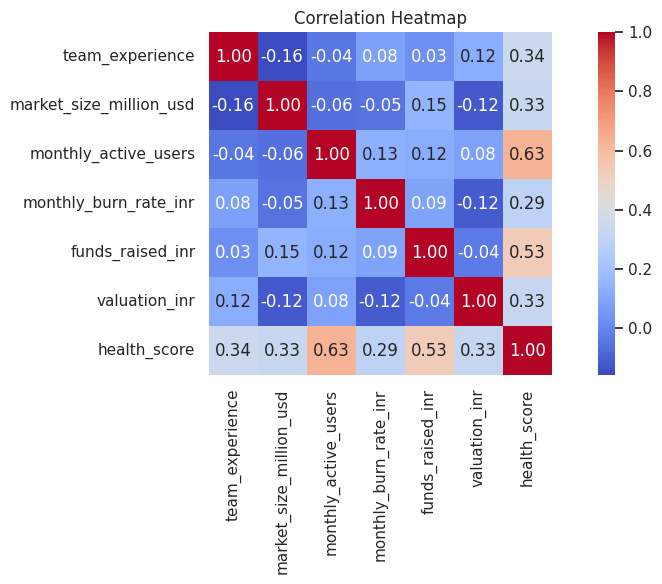

In [8]:
plt.figure(figsize=(10, 6))
corr = df_scaled[[
    'team_experience', 'market_size_million_usd', 'monthly_active_users',
    'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr', 'health_score'
]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


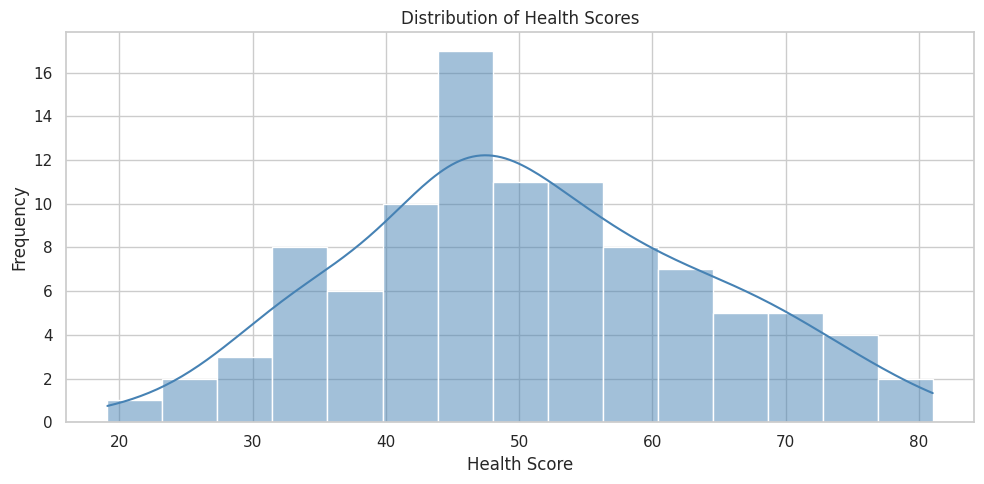

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['health_score'], bins=15, kde=True, color='steelblue')
plt.title('Distribution of Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
